In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#Load and preview the Airbnb listings raw data
df = pd.read_csv('listings-paris.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.869933,2.362511,Entire home/apt,125,3,0,NaN,NaN,1,39
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.833494,2.318518,Entire home/apt,75,3,7,2018-07-27,0.29,1,271
2,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.851001,2.358690,Entire home/apt,115,2,148,2018-11-21,1.29,1,113
3,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.857576,2.352751,Entire home/apt,115,10,231,2018-11-19,2.47,1,286
4,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.874642,2.343411,Entire home/apt,99,3,6,2015-09-14,0.06,1,164


In [72]:
listings = pd.DataFrame(df.neighbourhood.value_counts())
listings.reset_index(inplace=True)
listings.head()

,index,neighbourhood
0,Buttes-Montmartre,6903
1,Popincourt,5996
2,Vaugirard,4404
3,Entrepôt,4213
4,Batignolles-Monceau,4048


In [73]:
listings.neighbourhood = listings.neighbourhood.astype('object')
listings.rename(columns={'index':'neighbourhood', 'neighbourhood':'no_of_listings'}, inplace=True)
listings.head()

,neighbourhood,no_of_listings
0,Buttes-Montmartre,6903
1,Popincourt,5996
2,Vaugirard,4404
3,Entrepôt,4213
4,Batignolles-Monceau,4048


In [75]:
#Select relevant columns to keep in the dataframe
df = df[['neighbourhood', 'number_of_reviews']]
df.head()

,neighbourhood,number_of_reviews
0,Entrepôt,0
1,Observatoire,7
2,Hôtel-de-Ville,148
3,Hôtel-de-Ville,231
4,Opéra,6


In [121]:
#Group by neighbourhood to get total number of reviews for each
df = df.groupby(df['neighbourhood']).sum().reset_index().sort_values(by ="number_of_reviews", ascending=False)
df

,neighbourhood,number_of_reviews
3,Buttes-Montmartre,116534
15,Popincourt,102552
4,Entrepôt,80227
18,Vaugirard,75968
17,Temple,70790
1,Bourse,55759
0,Batignolles-Monceau,54021
6,Hôtel-de-Ville,53412
11,Opéra,52959
13,Panthéon,50439


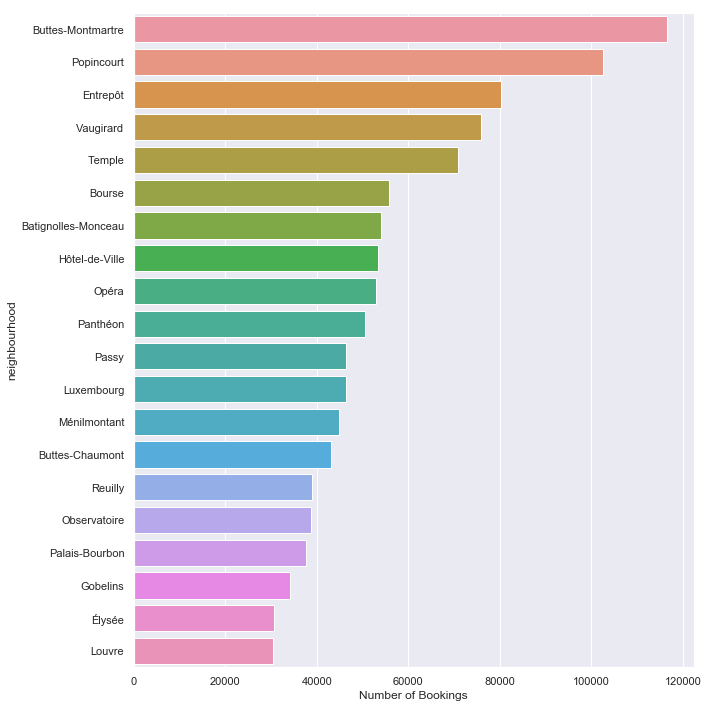

In [126]:
import seaborn as sns; sns.set()
plt.figure(figsize=(10,10))
sns.barplot(x="number_of_reviews", y="neighbourhood", orient="h", data=df)
plt.xlabel("Number of Bookings")
plt.tight_layout()
plt.savefig("bookings.png")

In [135]:
df= pd.merge(df, listings, on='neighbourhood')
df

,neighbourhood,number_of_reviews,no_of_listings
0,Buttes-Montmartre,116534,6903
1,Popincourt,102552,5996
2,Entrepôt,80227,4213
3,Vaugirard,75968,4404
4,Temple,70790,2846
5,Bourse,55759,1856
6,Batignolles-Monceau,54021,4048
7,Hôtel-de-Ville,53412,1908
8,Opéra,52959,2732
9,Panthéon,50439,2015


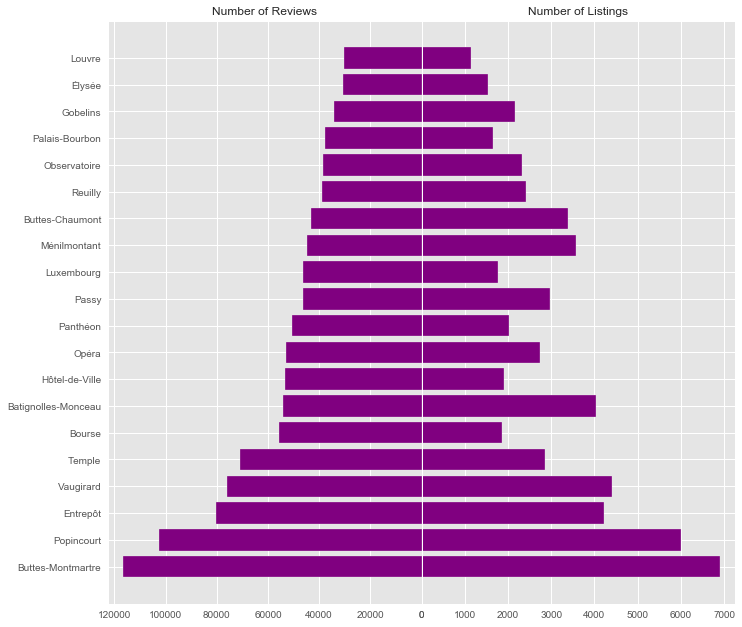

<Figure size 576x396 with 0 Axes>

In [202]:
y = df["neighbourhood"]
x1 = range(20)
x2 = range(0, 200, 10)

fig, axes = plt.subplots(ncols=2, sharey=True)

axes[0].barh(y, df["number_of_reviews"], align='center', color="purple")
axes[0].set(title='Number of Reviews')
axes[1].barh(y, df["no_of_listings"], align='center', color="purple")
axes[1].set(title='Number of Listings')

axes[0].invert_xaxis()
axes[0].set(yticks=y)


fig.subplots_adjust(wspace=0)

fig.set_size_inches(10,10)
plt.style.use('seaborn-notebook')
plt.show()
plt.savefig("reviewsvlistings.png")

In [89]:
df_new['reviews per listing'] = df_new['number_of_reviews']/df_new['no_of_listings']
df_new.sort_values(by='reviews per listing', ascending=False)

,neighbourhood,number_of_reviews,no_of_listings,reviews per listing
1,Bourse,55759,1856,30.0426
6,Hôtel-de-Ville,53412,1908,27.9937
8,Luxembourg,46385,1760,26.3551
7,Louvre,30410,1156,26.3062
13,Panthéon,50439,2015,25.0318
17,Temple,70790,2846,24.8735
12,Palais-Bourbon,37539,1657,22.6548
19,Élysée,30533,1527,19.9954
11,Opéra,52959,2732,19.3847
4,Entrepôt,80227,4213,19.0427


In [9]:
# #Normalize the values for each neighbourhood. Divide by total and multiply by 1000
# neighbourhood_df['normalized value (per 1000 reviews)'] = (neighbourhood_df['number_of_reviews']/neighbourhood_df['number_of_reviews'].sum() * 1000).round(0)
# neighbourhood_df.head()

,neighbourhood,number_of_reviews,normalized value (per 1000 reviews)
0,"Brightwood Park, Crestwood, Petworth",13429,48.0
1,"Brookland, Brentwood, Langdon",5337,19.0
2,"Capitol Hill, Lincoln Park",31095,112.0
3,"Capitol View, Marshall Heights, Benning Heights",1607,6.0
4,"Cathedral Heights, McLean Gardens, Glover Park",2650,10.0


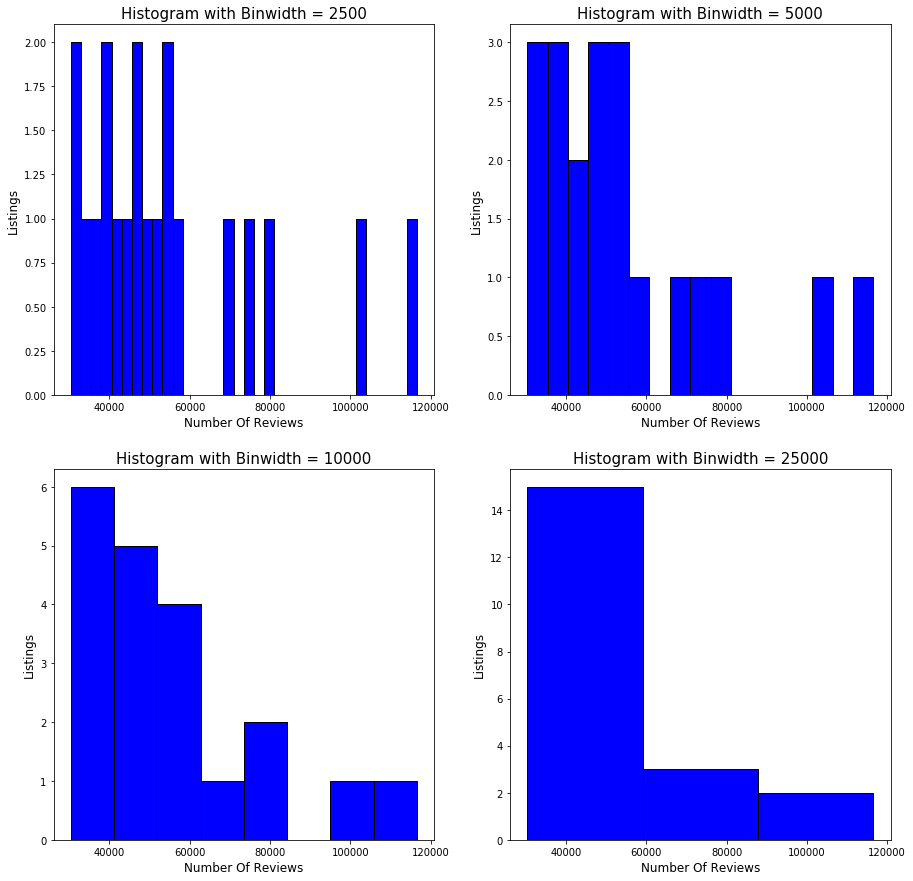

In [8]:
#Plot histogram to show the spread and shape of the data

plt.figure(figsize=(15,15))

# Show 4 different binwidths
for i, binwidth in enumerate([2500, 5000, 10000, 25000]):
    
    # Set up the plots
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plots
    ax.hist(df['number_of_reviews'], bins = int(86000/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Number Of Reviews', size = 12)
    ax.set_ylabel('Listings', size= 12)

plt.show()

In [10]:
df.to_csv('reviews-paris.csv')